In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# Load CSV

In [2]:

def load_imu_csv(filename):
    data = np.loadtxt(filename, delimiter=',', skiprows=1)
    return data[:, 0:3], data[:, 3:6]  # acc, gyro

# Kalman Filter (simple 1D per axis)

In [3]:
class KalmanFilter1D:
    def __init__(self, q=0.01, r=0.1):
        self.q = q  # process noise
        self.r = r  # measurement noise
        self.x = 0.0  # estimated value
        self.p = 1.0  # estimation error

    def update(self, measurement):
        # Prediction update
        self.p += self.q

        # Measurement update
        k = self.p / (self.p + self.r)
        self.x += k * (measurement - self.x)
        self.p *= (1 - k)
        return self.x



# Moving Average Filter

In [4]:
def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Infinite Impulse Response (Exponential Smoothing)

In [5]:
def iir_filter(data, alpha=0.1):
    filtered = np.zeros_like(data)
    filtered[0] = data[0]
    for i in range(1, len(data)):
        filtered[i] = alpha * data[i] + (1 - alpha) * filtered[i-1]
    return filtered

# Main

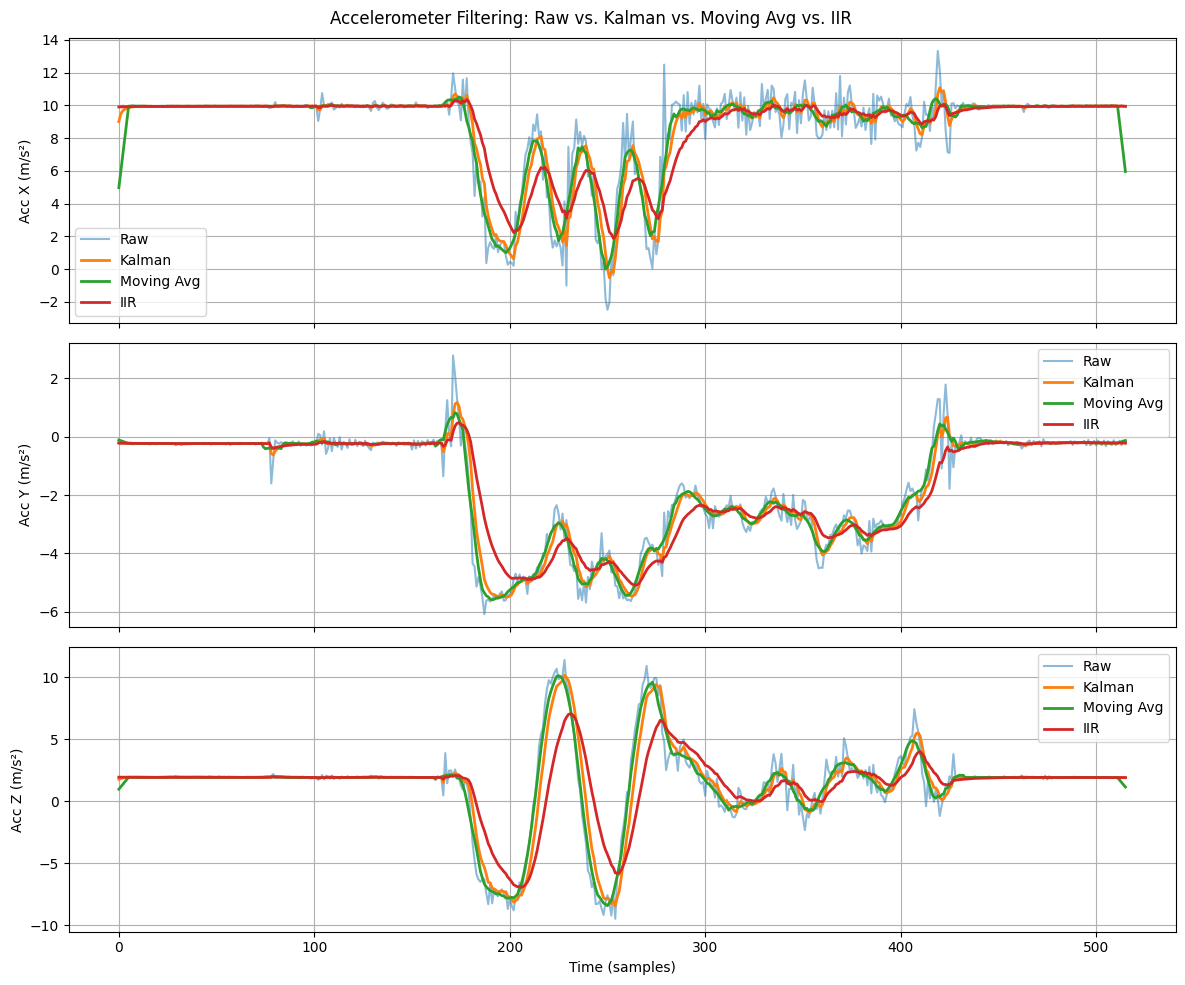

In [6]:
def main():
    csv_file = '/home/yudhis/Documents/PlatformIO/Projects/Capstone/client/data/imu_log_2025-05-03_20-49-00.csv'  # Replace with your file name
    acc_data, gyro_data = load_imu_csv(csv_file)

    axes = ['X', 'Y', 'Z']
    fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

    for i in range(3):
        raw = acc_data[:, i]

        # Kalman
        kalman = KalmanFilter1D()
        kalman_filtered = np.array([kalman.update(v) for v in raw])

        # Moving Average
        ma_filtered = moving_average(raw, window_size=10)

        # IIR
        iir_filtered = iir_filter(raw, alpha=0.1)

        axs[i].plot(raw, label='Raw', alpha=0.5)
        axs[i].plot(kalman_filtered, label='Kalman', linewidth=2)
        axs[i].plot(ma_filtered, label='Moving Avg', linewidth=2)
        axs[i].plot(iir_filtered, label='IIR', linewidth=2)
        axs[i].set_ylabel(f'Acc {axes[i]} (m/s²)')
        axs[i].legend()
        axs[i].grid(True)

    axs[-1].set_xlabel('Time (samples)')
    plt.suptitle('Accelerometer Filtering: Raw vs. Kalman vs. Moving Avg vs. IIR')
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()
